In [263]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [231]:
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [232]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

In [233]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

column_names = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"]
results = []

def k_to_f(k):
    return 9 / 5 * (k - 273) + 32

print("""
Beginning Data Retrieval     
-----------------------------
""")


# Build query URL
for index, city in enumerate(cities, start=1):
    print(f'Processing Record {index} of {len(cities)} | {city}')
    city_data = []
    query_url = f'{url}appid={api_key}&q={city}'
    weather_response = requests.get(query_url, city).json()
    
    if weather_response.get("cod") and weather_response.get("cod") == '404':
        print(f'{city} not found. Skipping...')
        continue
    
    try:
        city_data.append(city)                                           # Append City name 
        city_data.append(weather_response["coord"]["lat"])               # Append City Lat
        city_data.append(weather_response["coord"]["lon"])               # Append City Long
        city_data.append(k_to_f(weather_response["main"]["temp_max"]))   # Append Max Temp
        city_data.append(weather_response["main"]["humidity"])           # Append Hummidity
        city_data.append(weather_response["clouds"]["all"])   # Append Cloudiness
        city_data.append(weather_response["wind"]["speed"])              # Append Wind Speed
        city_data.append(weather_response["sys"]["country"])             # Append Country
        city_data.append(weather_response["dt"])                         # Append Date
        # Append city data to full data
        results.append(city_data)
        
    except:
        print(f'Unexpected issue with {city}: {weather_response}')


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of 635 | hobart
Processing Record 2 of 635 | punta arenas
Processing Record 3 of 635 | carnarvon
Processing Record 4 of 635 | athmallik
Processing Record 5 of 635 | ribeira grande
Processing Record 6 of 635 | mataura
Processing Record 7 of 635 | puerto ayora
Processing Record 8 of 635 | cape town
Processing Record 9 of 635 | hasaki
Processing Record 10 of 635 | nizhniy ingash
Processing Record 11 of 635 | galiwinku
galiwinku not found. Skipping...
Processing Record 12 of 635 | santander
Processing Record 13 of 635 | new norfolk
Processing Record 14 of 635 | ushuaia
Processing Record 15 of 635 | huixtla
Processing Record 16 of 635 | gilgit
Processing Record 17 of 635 | katwijk
Processing Record 18 of 635 | kindu
Processing Record 19 of 635 | port elizabeth
Processing Record 20 of 635 | laurel
Processing Record 21 of 635 | mys shmidta
mys shmidta not found. Skipping...
Processing Record 22 of 635 | east lon

Processing Record 190 of 635 | bolungarvik
bolungarvik not found. Skipping...
Processing Record 191 of 635 | potenza
Processing Record 192 of 635 | dikson
Processing Record 193 of 635 | esperance
Processing Record 194 of 635 | santa lucia
Processing Record 195 of 635 | alice springs
Processing Record 196 of 635 | chuy
Processing Record 197 of 635 | kazalinsk
kazalinsk not found. Skipping...
Processing Record 198 of 635 | tomari
Processing Record 199 of 635 | chicama
Processing Record 200 of 635 | bukoba
Processing Record 201 of 635 | toliary
toliary not found. Skipping...
Processing Record 202 of 635 | zemio
Processing Record 203 of 635 | mahajanga
Processing Record 204 of 635 | sao joao da barra
Processing Record 205 of 635 | klang
Processing Record 206 of 635 | road town
Processing Record 207 of 635 | olga
Processing Record 208 of 635 | sipka
sipka not found. Skipping...
Processing Record 209 of 635 | samarai
Processing Record 210 of 635 | jiuquan
Processing Record 211 of 635 | caxit

Processing Record 384 of 635 | buala
Processing Record 385 of 635 | ouadda
Processing Record 386 of 635 | soyo
Processing Record 387 of 635 | altay
Processing Record 388 of 635 | margate
Processing Record 389 of 635 | urucara
Processing Record 390 of 635 | shimoda
Processing Record 391 of 635 | ayan
Processing Record 392 of 635 | iquitos
Processing Record 393 of 635 | mount gambier
Processing Record 394 of 635 | shingu
Processing Record 395 of 635 | dukat
Processing Record 396 of 635 | lebu
Processing Record 397 of 635 | marv dasht
marv dasht not found. Skipping...
Processing Record 398 of 635 | lavrentiya
Processing Record 399 of 635 | arraial do cabo
Processing Record 400 of 635 | celendin
Processing Record 401 of 635 | parry sound
Processing Record 402 of 635 | warmbad
Processing Record 403 of 635 | paramirim
Processing Record 404 of 635 | santa isabel
Processing Record 405 of 635 | pevek
Processing Record 406 of 635 | jaguarari
Processing Record 407 of 635 | mugur-aksy
Processing R

Processing Record 576 of 635 | agirish
Processing Record 577 of 635 | saint anthony
Processing Record 578 of 635 | verin
Processing Record 579 of 635 | piacabucu
Processing Record 580 of 635 | yumen
Processing Record 581 of 635 | rolim de moura
rolim de moura not found. Skipping...
Processing Record 582 of 635 | mareeba
Processing Record 583 of 635 | umm kaddadah
Processing Record 584 of 635 | bodaybo
Processing Record 585 of 635 | lensk
Processing Record 586 of 635 | calabozo
Processing Record 587 of 635 | hinton
Processing Record 588 of 635 | rincon
Processing Record 589 of 635 | suntar
Processing Record 590 of 635 | inongo
Processing Record 591 of 635 | kavaratti
Processing Record 592 of 635 | krasnogorsk
Processing Record 593 of 635 | gubkinskiy
Processing Record 594 of 635 | nokaneng
Processing Record 595 of 635 | bargal
bargal not found. Skipping...
Processing Record 596 of 635 | campos
Processing Record 597 of 635 | tabiauea
tabiauea not found. Skipping...
Processing Record 598 

In [234]:
# Converting to dataframe 
df = pd.DataFrame(results, columns=column_names)

In [235]:
# Export into csv 
df.to_csv(output_data_file, index=False)

# show dataframe 
df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,61.070,48,75,4.10,AU,1596171205
1,punta arenas,-53.15,-70.92,37.670,93,100,6.70,CL,1596171245
2,carnarvon,-24.87,113.63,73.670,40,0,8.70,AU,1596171001
3,athmallik,20.72,84.53,94.316,56,89,0.29,IN,1596171051
4,ribeira grande,38.52,-28.70,69.638,79,9,6.07,PT,1596171246
...,...,...,...,...,...,...,...,...,...
577,coxim,-18.51,-54.76,70.232,55,51,3.51,BR,1596171492
578,uarini,-2.99,-65.11,70.268,64,0,0.74,BR,1596171400
579,januaria,-15.48,-44.37,62.402,54,0,2.67,BR,1596171493
580,marzuq,14.40,46.47,80.456,50,100,2.24,YE,1596171494


In [237]:
# Cities with humidity > 100 to remove 
drop_rows = df.loc[df['Humidity'] > 100].index

# Delete these row indexes from dataFrame
cleaned = df.drop(drop_rows, inplace=False)

# # Showing df after dropping rows 
cleaned

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,61.070,48,75,4.10,AU,1596171205
1,punta arenas,-53.15,-70.92,37.670,93,100,6.70,CL,1596171245
2,carnarvon,-24.87,113.63,73.670,40,0,8.70,AU,1596171001
3,athmallik,20.72,84.53,94.316,56,89,0.29,IN,1596171051
4,ribeira grande,38.52,-28.70,69.638,79,9,6.07,PT,1596171246
...,...,...,...,...,...,...,...,...,...
577,coxim,-18.51,-54.76,70.232,55,51,3.51,BR,1596171492
578,uarini,-2.99,-65.11,70.268,64,0,0.74,BR,1596171400
579,januaria,-15.48,-44.37,62.402,54,0,2.67,BR,1596171493
580,marzuq,14.40,46.47,80.456,50,100,2.24,YE,1596171494


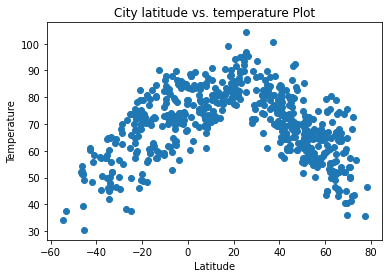

In [238]:
# Generate scatter lopt for Latitude vs. Temperature
lat_temp = cleaned.loc[:,['Lat', 'Max Temp']]

x= lat_temp['Lat']; y = lat_temp['Max Temp'];
plt.scatter(x,y)
plt.title("City latitude vs. temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

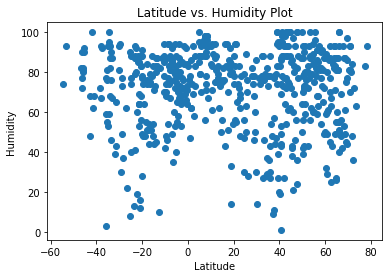

In [239]:
# Generate scatter lopt for  Latitude vs. Humidity Plot
lat_hum = cleaned.loc[:,['Lat', 'Humidity']]

x= lat_hum['Lat']; y = lat_hum['Humidity'];
plt.scatter(x,y)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity ")
plt.show()

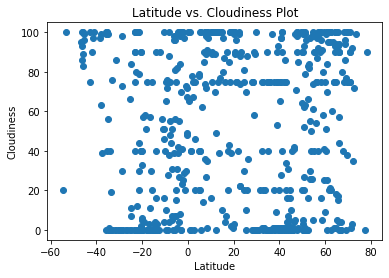

In [240]:
# Generate scatter lopt for Latitude vs. Cloudiness Plot
lat_clo = cleaned.loc[:,['Lat', 'Cloudiness']]

x= lat_clo['Lat']; y = lat_clo['Cloudiness'];
plt.scatter(x,y)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

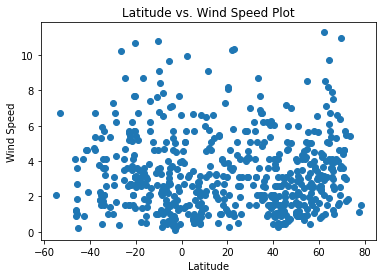

In [241]:
# Generate scatter lopt for Latitude vs. Wind Speed Plot
lat_win = cleaned.loc[:,['Lat', 'Wind Speed']]

x= lat_win['Lat']; y = lat_win['Wind Speed'];
plt.scatter(x,y)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

In [243]:
# Northern Hemisphere DataFrames
northern_hem = cleaned.loc[cleaned['Lat'] >= 0]

# Show dataframe 
northern_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,athmallik,20.72,84.53,94.316,56,89,0.29,IN,1596171051
4,ribeira grande,38.52,-28.70,69.638,79,9,6.07,PT,1596171246
8,hasaki,35.73,140.83,84.272,88,75,2.60,JP,1596171003
9,nizhniy ingash,56.20,96.53,64.832,81,99,3.82,RU,1596171248
10,santander,43.46,-3.80,72.266,88,4,2.60,ES,1596171202
...,...,...,...,...,...,...,...,...,...
571,pietarsaari,63.65,22.68,61.268,82,1,3.10,FI,1596171490
572,salalah,17.02,54.09,82.670,94,90,1.00,OM,1596170933
574,gewane,10.17,40.65,72.770,84,100,5.99,ET,1596171491
576,moundsville,39.92,-80.74,69.278,93,20,2.10,US,1596171492


In [244]:
# Southern Hemisphere DataFrames

southern_hem = cleaned.loc[cleaned['Lat'] <= 0]

#show dataframe 
southern_hem 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,61.070,48,75,4.10,AU,1596171205
1,punta arenas,-53.15,-70.92,37.670,93,100,6.70,CL,1596171245
2,carnarvon,-24.87,113.63,73.670,40,0,8.70,AU,1596171001
5,mataura,-46.19,168.86,54.464,77,93,1.20,NZ,1596171247
6,puerto ayora,-0.74,-90.35,67.262,92,73,1.34,EC,1596170893
...,...,...,...,...,...,...,...,...,...
575,honiara,-9.43,159.95,88.070,70,75,3.60,SB,1596171492
577,coxim,-18.51,-54.76,70.232,55,51,3.51,BR,1596171492
578,uarini,-2.99,-65.11,70.268,64,0,0.74,BR,1596171400
579,januaria,-15.48,-44.37,62.402,54,0,2.67,BR,1596171493


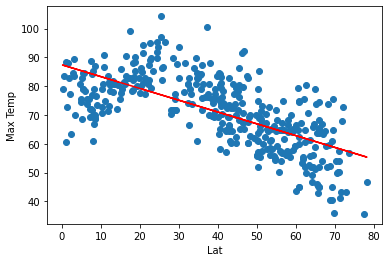

 The r-squared is: 0.44858925258539073


In [319]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

def len_regression(df, x_index, y_index):
    x_np_array = df.iloc[:, x_index].values
    y_np_array = df.iloc[:, y_index].values
    
    x = x_np_array.reshape(-1, 1)
    y = y_np_array.reshape(-1, 1)
    
    linear_regressor = LinearRegression() 
    linear_regressor.fit(x, y)
    y_pred = linear_regressor.predict(x)
    
    plt.xlabel(df.columns[x_index])
    plt.ylabel(df.columns[y_index])
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.show() 
    # calculating r-squared and printing it 
    r_sq = r2_score(y, y_pred)
    print(f' The r-squared is: {r_sq}')

#calling function 
len_regression(northern_hem, 1, 3)


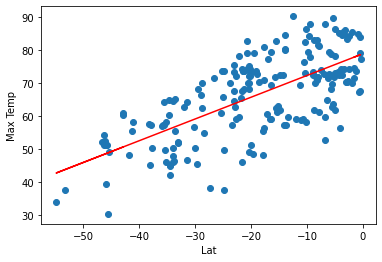

 The r-squared is: 0.47230162098718076


In [320]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression


#calling function 
len_regression(southern_hem, 1, 3)


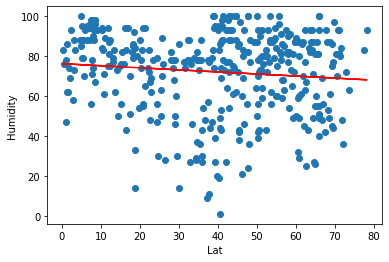

 The r-squared is: 0.010490271830189135


In [321]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem,1,4)



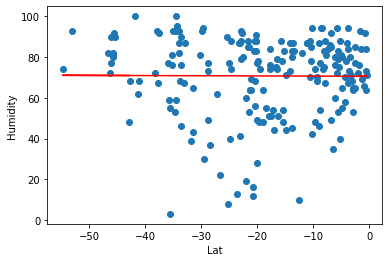

 The r-squared is: 3.413465593771203e-05


In [322]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem,1,4)



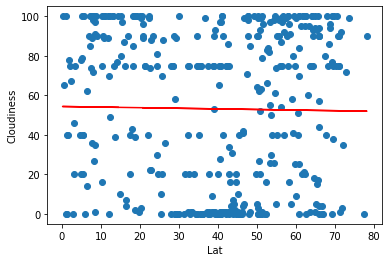

 The r-squared is: 0.0002510135525686241


In [315]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem,1,5)



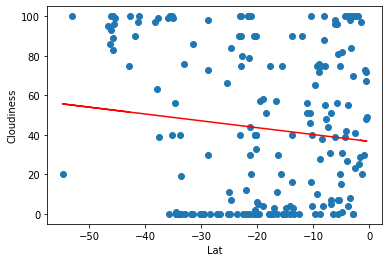

 The r-squared is: 0.01377638356136468


In [316]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem,1,5)



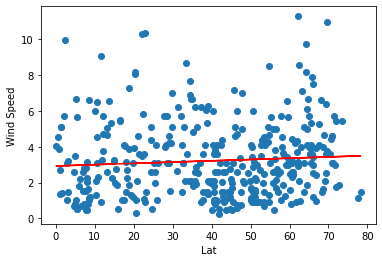

 The r-squared is: 0.00497397725741322


In [317]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#calling function 
len_regression(northern_hem,1,6)

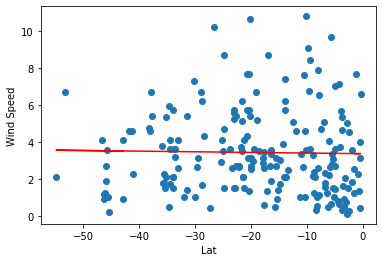

 The r-squared is: 0.00039635273895166634


In [318]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#calling function 
len_regression(southern_hem,1,6)